In [15]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import sys
import os
from pathlib import Path

import psana as ps

In [16]:
plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=12)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

epics for GMD:
    GMD_ACQ_RAW

epics for GEM:
    GDWaveform_241 to 244

In [17]:
exp_name = 'sxrx21715'
run = 104

In [18]:
dstr = 'exp={}:run={}'.format(exp_name, run) # do not take smd to access raw GMD waveforms
print('\n'+dstr+'\n')
# ds = ps.DataSource(dstr)
ds = ps.MPIDataSource(dstr)
ds.detnames()


exp=sxrx21715:run=104



[('NoDetector.0:Evr.0', 'evr0', ''),
 ('SxrEndstation.0:Acqiris.2', 'Acq02', ''),
 ('SxrEndstation.0:Acqiris.1', 'Acq01', ''),
 ('NoDetector.0:Evr.1', 'evr1', ''),
 ('EBeam', '', ''),
 ('PhaseCavity', '', ''),
 ('FEEGasDetEnergy', '', ''),
 ('GMD', '', ''),
 ('ControlData', '', '')]

In [19]:
# ds.detnames('epics')
for det in ds.detnames('epics'):
    if 'GMD_ACQ_RAW' in det[1]:
        print(det)
    if 'GDWaveform_241' in det[1]:
        print(det)

('SXR:GMD:ACQ:01:CH1:Data', 'GMD_ACQ_RAW', '')


In [21]:
gmd = ps.Detector('GMD_ACQ_RAW')
# gem = ps.Detector('GDWaveform_241')
# acq = ps.Detector('Acq01')
# acq = ps.Detector('acq02')
# ebeam = ps.Detector('EBeam')
# evr = ps.Detector('evr0')

In [7]:
dat = []
nevt_max = 100
for nevt,evt in enumerate(ds.events()):
    dat.append(-gmd())
    if nevt==nevt_max: break
dat = np.asarray(dat)

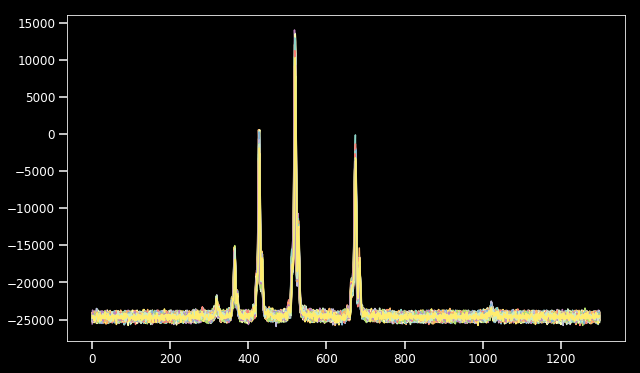

In [8]:
plt.plot(dat[0:100,400:1700].T)
plt.show()

In [9]:
fname = './GMD_{}_r{}.csv'.format(exp_name, str(run))
print(fname)
np.savetxt(fname, dat, delimiter=',')

./GMD_sxrx21715_r104.csv
